In [1]:
import os
import ipywidgets as widgets
import datetime
import xarray as xr

from download_sst import download_hw
from utils import plot_sst

rpath = './sst_raw/'
if not os.path.isdir(rpath): os.mkdir(rpath)

/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


satpy not available


---

# Select date and time

In [2]:
wdate = widgets.DatePicker(
    description='Pick a Date',
    disabled=False)
wdate.value = datetime.datetime(2016,3,3)
#
whour = widgets.IntSlider(description='hour')
whour.max = 23
wmin = widgets.IntSlider(description='minutes')
wmin.max=50
wmin.min=0
wmin.step=10
#
display(wdate, whour, wmin)
#
tstart = wdate.value + datetime.timedelta(hours=whour.value, minutes=wmin.value)

DatePicker(value=datetime.datetime(2016, 3, 3, 0, 0), description='Pick a Date')

IntSlider(value=0, description='hour', max=23)

IntSlider(value=0, description='minutes', max=50, step=10)

In [3]:
style = {'description_width': 'initial'}

wcentering = widgets.Dropdown(
    options=['start', 'center', 'end'],
    value='center',
    description='Centering',
    disabled=False, style=style)
#
wdelt_d = widgets.IntSlider(description='days')
wdelt_d.min = 0
wdelt_d.max = 100
wdelt_d.step = 1
#
wdelt_h = widgets.IntSlider(description='hours')
wdelt_h.min = 0
wdelt_h.max = 23
wdelt_h.step = 1
wdelt_h.value = 1
#
print('Time interval')
display(wdelt_d, wdelt_h, wcentering)

Time interval


IntSlider(value=0, description='days')

IntSlider(value=1, description='hours', max=23)

Dropdown(description='Centering', index=1, options=('start', 'center', 'end'), style=DescriptionStyle(description_width='initial'), value='center')

---

# Download


In [5]:
delt = datetime.timedelta(days=wdelt_d.value, hours=wdelt_h.value)
if wcentering.value is 'center':
    tstart = wdate.value - delt/2.
elif wcentering.value is 'end':
    tstart = tstart - delt

print('start time: '+str(tstart))
print('time interval considered: '+ str(delt))
    
time = [tstart+datetime.timedelta(minutes=10*n) for n in range(int(delt.total_seconds()/60/10))]

sstfiles = download_hw(time[:], rpath)

start time: 2016-03-02 23:30:00
time interval considered: 1:00:00
Logged in JAXA ftp
20160302233000-JAXA-L2P_GHRSST-SSTskin-H08_AHI-v1.2-v02.0-fv01.0.nc is already on disk
No sst file found, download from jaxa ftp: 20160302234000-JAXA-L2P_GHRSST-SSTskin-H08_AHI-v1.2-v02.0-fv01.0.nc
20160302235000-JAXA-L2P_GHRSST-SSTskin-H08_AHI-v1.2-v02.0-fv01.0.nc is already on disk
20160303000000-JAXA-L2P_GHRSST-SSTskin-H08_AHI-v1.2-v02.0-fv01.0.nc is already on disk
20160303001000-JAXA-L2P_GHRSST-SSTskin-H08_AHI-v1.2-v02.0-fv01.0.nc is already on disk
20160303002000-JAXA-L2P_GHRSST-SSTskin-H08_AHI-v1.2-v02.0-fv01.0.nc is already on disk


---

# Inspect data

In [6]:
print('Select a time')
options = [(i.strftime('%x %X'), i) for i in time]
wsel = widgets.SelectionSlider(
            options=options,
            value=tstart+delt/2.,
            description='',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True)
display(wsel)

Select a time


SelectionSlider(continuous_update=False, index=3, options=(('03/02/16 23:30:00', datetime.datetime(2016, 3, 2, 23, 30)), ('03/02/16 23:40:00', datetime.datetime(2016, 3, 2, 23, 40)), ('03/02/16 23:50:00', datetime.datetime(2016, 3, 2, 23, 50)), ('03/03/16 00:00:00', datetime.datetime(2016, 3, 3, 0, 0)), ('03/03/16 00:10:00', datetime.datetime(2016, 3, 3, 0, 10)), ('03/03/16 00:20:00', datetime.datetime(2016, 3, 3, 0, 20))), value=datetime.datetime(2016, 3, 3, 0, 0))

In [7]:
sst = xr.open_dataset(sstfiles[time.index(wsel.value)])['sea_surface_temperature']-273.15
sst = sst.where(sst>0)
print(sst)

In [10]:
# subset
sst = sst.isel(time=0).sel(lon=slice(120,130),lat=slice(10,-10))

satpy not available


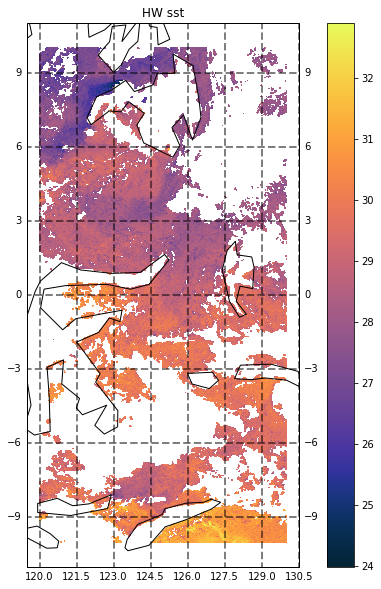

In [13]:
plot_sst(sst)